# Load Libraries


In [491]:
library("rcompanion")
library("car")
library("effects")
library("multcomp")
library("dplyr")
library("tidyverse")




# Load in Data


In [492]:
NYR=read.csv("/Users/jeannekiluva/Desktop/New_years_resolutions.csv")

In [493]:
head(NYR)

,tweet_created,tweet_text,tweet_category,tweet_topics,tweet_location,tweet_state,tweet_region,user_timezone,user_gender,retweet_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2014-12-21 16:11:00,#NewYearsResolution to not put the parking lot ticket directly in my mouth right after getting it from the machine #ew,Humor,Humor about Personal Growth and Interests Resolutions,"City of Angels, CA",CA,West,Pacific Time (US & Canada),male,NA
2,2014-12-21 16:16:00,I got the hair. I just need to work on the body to pull off Lara Croft next Halloween #NewYearsResolution http://t.co/Ihqh5Z7prx,Health & Fitness,Improve my body,"Arlington, TX",TX,South,Central Time (US & Canada),male,NA
3,2014-12-21 16:30:00,"Self improvement!.. Mentally, physically, and financially. #NewYearsResolution",Personal Growth,Improve my attitude,"Las Vegas, NV",NV,West,Central Time (US & Canada),male,NA
4,2014-12-21 17:51:00,I've decided to get pregnant in #2015 #NewYearsResolution,Humor,Humor about Family/Friends/Relationships Resolutions,"Ft. Luderdale, Florida",FL,South,,male,NA
5,2014-12-21 18:09:00,All I want for Christmas is to be Carrie Underwood. #NewYearsResolution,Personal Growth,Other,South Carolina,SC,South,Pacific Time (US & Canada),female,NA
6,2014-12-21 18:18:00,"Note to self: ""Stop being lazy &amp; get back into hot yoga."" I have a monthly pass, so no excuses! #hotyoga #newyearsresolution #healthiswealth",Health & Fitness,Excersize More,NYC,NY,Northeast,Quito,female,NA


# Rename Columns

In [494]:
NYR <- NYR%>% rename(Date=tweet_created,Tweet=tweet_text,Category=tweet_category,Topics=tweet_topics,Location=tweet_location,State=tweet_state,Region=tweet_region,TZ=user_timezone,Gender=user_gender)

In [495]:
head(NYR)

,Date,Tweet,Category,Topics,Location,State,Region,TZ,Gender,retweet_count
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,2014-12-21 16:11:00,#NewYearsResolution to not put the parking lot ticket directly in my mouth right after getting it from the machine #ew,Humor,Humor about Personal Growth and Interests Resolutions,"City of Angels, CA",CA,West,Pacific Time (US & Canada),male,NA
2,2014-12-21 16:16:00,I got the hair. I just need to work on the body to pull off Lara Croft next Halloween #NewYearsResolution http://t.co/Ihqh5Z7prx,Health & Fitness,Improve my body,"Arlington, TX",TX,South,Central Time (US & Canada),male,NA
3,2014-12-21 16:30:00,"Self improvement!.. Mentally, physically, and financially. #NewYearsResolution",Personal Growth,Improve my attitude,"Las Vegas, NV",NV,West,Central Time (US & Canada),male,NA
4,2014-12-21 17:51:00,I've decided to get pregnant in #2015 #NewYearsResolution,Humor,Humor about Family/Friends/Relationships Resolutions,"Ft. Luderdale, Florida",FL,South,,male,NA
5,2014-12-21 18:09:00,All I want for Christmas is to be Carrie Underwood. #NewYearsResolution,Personal Growth,Other,South Carolina,SC,South,Pacific Time (US & Canada),female,NA
6,2014-12-21 18:18:00,"Note to self: ""Stop being lazy &amp; get back into hot yoga."" I have a monthly pass, so no excuses! #hotyoga #newyearsresolution #healthiswealth",Health & Fitness,Excersize More,NYC,NY,Northeast,Quito,female,NA


#Drop Columns

In [496]:
NYRtrim = (within(NYR, rm(Location,retweet_count,TZ)))

In [497]:
na.omit(NYRtrim)

,Date,Tweet,Category,Topics,State,Region,Gender
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2014-12-21 16:11:00,#NewYearsResolution to not put the parking lot ticket directly in my mouth right after getting it from the machine #ew,Humor,Humor about Personal Growth and Interests Resolutions,CA,West,male
2,2014-12-21 16:16:00,I got the hair. I just need to work on the body to pull off Lara Croft next Halloween #NewYearsResolution http://t.co/Ihqh5Z7prx,Health & Fitness,Improve my body,TX,South,male
3,2014-12-21 16:30:00,"Self improvement!.. Mentally, physically, and financially. #NewYearsResolution",Personal Growth,Improve my attitude,NV,West,male
4,2014-12-21 17:51:00,I've decided to get pregnant in #2015 #NewYearsResolution,Humor,Humor about Family/Friends/Relationships Resolutions,FL,South,male
5,2014-12-21 18:09:00,All I want for Christmas is to be Carrie Underwood. #NewYearsResolution,Personal Growth,Other,SC,South,female
6,2014-12-21 18:18:00,"Note to self: ""Stop being lazy &amp; get back into hot yoga."" I have a monthly pass, so no excuses! #hotyoga #newyearsresolution #healthiswealth",Health & Fitness,Excersize More,NY,Northeast,female
7,2014-12-21 18:50:00,RT @ashley_pg19: I'm sick of waiting on life to happen. I want to make my life worth living. _Ùâ_ÙÎÈ #life #loveyourlife #christmastime #NewYear‰Û_,Personal Growth,Be more positive,WI,Midwest,female
8,2014-12-21 19:12:00,I have to go do my 6 mile run. #stayingFIT #toneUP #StallionBOOTY #NewYearsResolution starts now.,Health & Fitness,Excersize More,CA,West,female
9,2014-12-21 19:32:00,social media purging &gt; #NewYearsResolution,Personal Growth,Try new things,TN,South,female


In [498]:
head(NYRtrim)

,Date,Tweet,Category,Topics,State,Region,Gender
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,2014-12-21 16:11:00,#NewYearsResolution to not put the parking lot ticket directly in my mouth right after getting it from the machine #ew,Humor,Humor about Personal Growth and Interests Resolutions,CA,West,male
2,2014-12-21 16:16:00,I got the hair. I just need to work on the body to pull off Lara Croft next Halloween #NewYearsResolution http://t.co/Ihqh5Z7prx,Health & Fitness,Improve my body,TX,South,male
3,2014-12-21 16:30:00,"Self improvement!.. Mentally, physically, and financially. #NewYearsResolution",Personal Growth,Improve my attitude,NV,West,male
4,2014-12-21 17:51:00,I've decided to get pregnant in #2015 #NewYearsResolution,Humor,Humor about Family/Friends/Relationships Resolutions,FL,South,male
5,2014-12-21 18:09:00,All I want for Christmas is to be Carrie Underwood. #NewYearsResolution,Personal Growth,Other,SC,South,female
6,2014-12-21 18:18:00,"Note to self: ""Stop being lazy &amp; get back into hot yoga."" I have a monthly pass, so no excuses! #hotyoga #newyearsresolution #healthiswealth",Health & Fitness,Excersize More,NY,Northeast,female


# Which region in the United States plans on going to the gym more based on tweets? Target advertising in these regions.


# Total number of Tweets is 4723

In [499]:
str(NYRtrim)

'data.frame':	4723 obs. of  7 variables:
 $ Date    : chr  "2014-12-21 16:11:00" "2014-12-21 16:16:00" "2014-12-21 16:30:00" "2014-12-21 17:51:00" ...
 $ Tweet   : chr  "#NewYearsResolution to not put the parking lot ticket directly in my mouth right after getting it from the machine #ew" "I got the hair. I just need to work on the body to pull off Lara Croft next Halloween #NewYearsResolution http:"| __truncated__ "Self improvement!.. Mentally, physically, and financially. #NewYearsResolution" "I've decided to get pregnant in #2015 #NewYearsResolution" ...
 $ Category: chr  "Humor" "Health & Fitness" "Personal Growth" "Humor" ...
 $ Topics  : chr  "Humor about Personal Growth and Interests Resolutions" "Improve my body" "Improve my attitude" "Humor about Family/Friends/Relationships Resolutions" ...
 $ State   : chr  "CA" "TX" "NV" "FL" ...
 $ Region  : chr  "West" "South" "West" "South" ...
 $ Gender  : chr  "male" "male" "male" "male" ...


# Number of Health and Fitness tweets is 825

In [500]:
table(NYRtrim$Category)


                      Career           Education/Training 
                         123                           87 
Family/Friends/Relationships                      Finance 
                         327                          167 
            Health & Fitness                        Humor 
                         825                          887 
             Personal Growth                Philanthropic 
                        1678                           83 
        Recreation & Leisure Time Management/Organization 
                         461                           85 

In [501]:
table(NYRtrim$Region)


  Midwest Northeast     South      West 
      959      1009      1539      1216 

In [502]:
NumberOfTweets= 825

#Recode category

In [503]:
NYRtrim$CategoryR <- NA

In [504]:


NYRtrim$CategoryR[NYRtrim$Category=='Career'] <- 0
NYRtrim$CategoryR[NYRtrim$Category=='Education/Training'] <- 1
NYRtrim$CategoryR[NYRtrim$Category=='Family/Friends/Relationships'] <- 2
NYRtrim$CategoryR[NYRtrim$Category=='Finance'] <- 3
NYRtrim$CategoryR[NYRtrim$Category=='Health & Fitness'] <- 4
NYRtrim$CategoryR[NYRtrim$Category=='Humor'] <- 5
NYRtrim$CategoryR[NYRtrim$Category=='Personal Growth'] <- 6
NYRtrim$CategoryR[NYRtrim$Category=='Philanthropic'] <- 7
NYRtrim$CategoryR[NYRtrim$Category=='Recreation & Leisure'] <- 8
NYRtrim$CategoryR[NYRtrim$Category=='Time Management/Organization'] <- 9
NYRtrim$CategoryR

[1] 5 4 6 5 6 4 6 4 6 5 4 3 5 7 6 8 4 7 9 7 6 8 6 6 4 5 2 2 6 9 2 4 4 8 0 4 6
  [38] 6 8 6 4 6 5 6 6 4 6 6 6 3 6 4 4 4 6 4 6 5 6 6 5 8 3 5 8 5 6 4 8 6 6 4 6 6
  [75] 6 6 4 6 6 6 8 4 6 8 2 6 5 4 3 6 6 5 6 4 6 6 6 1 4 6 8 4 6 8 6 8 2 5 5 8 6
 [112] 2 4 4 6 8 2 6 5 6 4 5 5 4 6 6 0 4 6 4 5 5 6 7 2 5 1 6 4 6 6 2 6 6 6 4 5 4
 [149] 4 2 6 6 6 8 1 8 7 1 8 8 1 3 6 6 6 6 0 6 6 5 6 5 6 5 6 6 4 5 4 5 9 6 4 2 8
 [186] 2 5 8 6 8 4 6 4 8 2 6 1 4 6 4 8 8 4 8 6 6 6 6 8 6 0 4 6 6 6 3 0 6 0 4 4 4
 [223] 6 5 5 4 5 2 7 6 4 5 7 7 5 6 6 5 4 5 9 7 1 2 6 5 4 6 5 5 4 8 6 6 4 2 6 6 4
 [260] 9 8 1 5 6 6 4 0 6 6 3 6 6 5 6 6 2 2 5 8 5 6 5 5 4 6 6 6 6 5 4 6 4 4 6 6 6
 [297] 5 0 2 4 4 0 6 4 6 6 6 8 6 5 2 2 5 3 5 8 6 2 6 7 4 4 2 8 6 7 6 8 3 4 4 6 6
 [334] 8 6 6 8 2 9 5 0 0 6 5 8 6 2 4 6 6 6 6 5 4 4 5 7 6 4 6 6 6 6 4 4 6 5 6 6 5
 [371] 6 4 6 6 4 4 6 4 4 5 6 4 4 6 6 6 3 6 9 6 6 6 6 6 8 4 3 7 6 5 5 1 2 9 6 6 6
 [408] 6 5 5 4 7 8 5 1 6 6 2 4 5 6 4 6 4 8 8 4 6 6 6 6 6 6 5 4 6 6 6 9 4 6 6 5 4
 [445] 4 2 6 6 0 6 6 6 6 4 6 8 6 2 6 6 6 5 4 6 6 8 5 6 5 6 6 7 6 4 4 6 3 4 3 6 6
 [482] 4 4 4 4 3 8 6 5 8 6 6 4 6 0 5 8 5 5 6 2 8 6 8 6 2 8 6 4 4 5 8 6 4 4 6 4 8
 [519] 5 6 4 6 1 6 6 8 6 6 9 8 2 8 4 4 7 2 6 5 5 6 6 5 6 6 8 7 2 8 5 6 6 5 6 8 6
 [556] 1 8 2 4 5 4 5 1 4 6 9 6 5 5 6 6 4 6 5 4 5 9 8 2 6 7 6 1 5 2 6 4 3 8 6 3 3
 [593] 3 3 3 3 6 6 6 9 4 3 7 0 5 4 6 6 6 3 6 3 4 3 2 6 4 4 6 2 3 6 6 6 4 4 3 6 6
 [630] 0 6 4 3 3 6 6 6 4 8 6 3 3 6 4 1 6 5 9 6 6 3 4 4 4 2 6 3 4 5 3 4 4 4 3 3 5
 [667] 0 6 6 6 6 6 6 8 3 5 6 6 4 6 3 6 6 4 7 6 8 4 2 3 6 4 6 3 4 6 5 6 2 0 3 6 0
 [704] 6 6 6 5 3 5 6 4 6 6 6 6 2 6 5 2 4 8 2 6 6 4 5 3 8 6 5 2 3 6 0 3 6 8 6 6 4
 [741] 5 7 4 5 5 9 5 6 5 6 6 3 6 6 5 6 3 2 6 6 4 6 8 6 2 9 6 4 0 8 4 2 5 5 4 5 6
 [778] 5 6 5 6 4 8 1 3 4 6 4 8 4 4 4 8 3 2 6 6 6 4 6 7 4 6 8 4 9 3 6 0 2 6 6 5 5
 [815] 6 4 8 2 6 4 3 6 2 8 9 1 8 5 3 5 5 5 6 6 8 6 4 6 4 5 8 5 6 6 5 6 6 6 6 4 4
 [852] 4 2 3 5 6 3 6 4 9 6 6 6 6 6 6 3 6 1 6 4 4 6 6 2 6 2 4 9 6 4 4 8 4 6 5 6 0
 [889] 8 6 6 6 6 5 5 3 6 6 6 4 2 4 5 6 3 2 6 6 2 6 3 4 3 5 4 2 5 8 8 6 6 4 4 2 4
 [926] 5 6 8 5 6 4 3 8 0 8 2 6 4 3 5 6 4 4 4 8 5 4 6 6 7 4 4 8 6 6 1 5 6 5 5 8 6
 [963] 6 2 6 2 4 6 3 2 8 5 4 4 6 3 5 9 4 0 5 6 9 9 6 7 6 4 2 8 8 0 6 6 6 6 2 7 5
[1000] 3 2 4 6 5 6 4 0 4 2 6 8 0 8 6 6 4 8 9 5 4 8 4 0 4 4 8 5 5 6 6 5 6 4 4 0 6
[1037] 6 6 5 6 1 6 6 5 6 5 3 4 5 6 6 5 5 2 5 4 6 8 5 6 5 3 5 6 5 2 3 8 6 3 4 8 5
[1074] 8 6 1 6 1 6 2 4 0 4 6 4 4 6 4 6 5 9 4 5 6 5 7 4 6 4 6 9 3 5 3 5 5 4 6 4 6
[1111] 6 6 5 6 1 5 4 5 1 6 5 4 4 5 5 6 5 8 4 5 9 4 6 5 2 4 8 6 5 4 5 5 4 5 6 8 6
[1148] 5 4 4 5 6 3 4 6 4 6 6 2 4 0 4 4 9 4 3 8 4 4 8 4 6 3 4 6 6 9 3 9 4 5 4 2 8
[1185] 4 3 4 6 8 8 8 4 5 6 6 4 8 4 4 7 6 4 4 5 5 5 5 2 5 4 6 5 2 5 6 5 4 8 5 5 0
[1222] 4 6 9 6 4 6 4 6 4 2 5 4 0 4 2 5 4 5 5 4 8 1 6 2 6 6 5 7 5 4 3 0 8 6 6 4 5
[1259] 6 4 6 6 6 8 5 2 6 2 4 4 5 5 5 4 3 6 6 7 5 2 5 5 5 4 5 6 3 0 5 5 5 6 2 4 2
[1296] 3 4 5 6 5 4 5 6 9 2 6 4 4 1 5 0 5 4 6 4 6 4 0 8 5 4 6 6 0 6 6 6 6 6 9 6 9
[1333] 5 6 6 4 1 6 6 4 4 4 4 6 6 6 0 6 8 4 6 6 5 2 8 1 4 5 8 4 6 6 1 8 4 2 3 6 6
[1370] 2 5 4 5 6 6 5 6 6 5 6 4 6 6 6 6 5 5 6 8 8 8 6 6 2 4 6 5 6 2 6 0 6 6 6 6 6
[1407] 6 4 6 6 4 5 6 7 6 6 6 6 3 6 6 4 2 4 6 6 8 4 5 6 5 5 6 5 9 6 6 4 8 5 9 6 6
[1444] 5 8 7 4 6 6 3 6 3 6 6 6 3 8 4 0 8 0 5 2 5 4 6 4 5 4 5 6 4 6 6 1 2 6 4 4 7
[1481] 7 9 2 6 2 4 0 6 2 6 5 6 4 4 5 6 4 5 4 6 4 0 4 9 6 6 6 4 6 6 8 6 4 2 6 6 8
[1518] 6 0 6 5 1 4 2 6 0 2 4 5 6 5 5 4 5 6 9 5 6 8 2 1 5 6 2 5 8 5 4 6 4 4 6 3 6
[1555] 6 6 6 5 6 6 6 6 6 5 6 7 6 2 6 2 9 4 6 5 6 4 4 6 4 5 6 6 6 6 6 5 5 2 6 5 3
[1592] 4 4 5 8 2 4 6 6 5 9 1 2 5 5 5 2 4 3 5 8 5 3 6 6 6 5 5 6 6 7 4 9 6 8 5 8 7
[1629] 6 6 4 4 6 5 1 5 6 6 8 2 5 6 5 8 6 6 6 6 5 4 6 4 5 5 5 5 6 4 7 4 5 5 6 6 5
[1666] 6 6 2 4 6 6 6 5 8 5 5 6 6 4 6 6 5 4 9 5 5 6 6 5 6 5 6 2 4 5 6 4 4 6 0 8 8
[1703] 5 4 2 4 6 6 6 3 4 5 6 6 4 6 6 6 2 8 5 6 2 6 6 5 5 5 4 2 8 6 6 6 6 8 8 6 5
[1740] 6 6 6 8 6 1 6 5 5 2 2 9 5 5 6 6 8 2 2 0 6 8 9 0 4 4 5 6 6 6 5 5 1 0 6 0 6
[1777] 5 4 4 2 4 4 2 4 5 2 2 6 2 3 4 6 6 6 7 4 5 4 4 6 6 6 6 6 4 6 5 5 8 6 6 2 0
[1814] 5 6 5 6 5 4 5 5 6 6 3 5 5 4

# Recode Region

In [505]:
NYRtrim$RegionR <- NA

In [506]:
NYRtrim$RegionR[NYRtrim$Region=='West'] <- 0
NYRtrim$RegionR[NYRtrim$Region=='South'] <- 1
NYRtrim$RegionR[NYRtrim$Region=='Northeast'] <- 2
NYRtrim$RegionR[NYRtrim$Region=='Midwest'] <- 3
NYRtrim$RegionR


[1] 0 1 0 1 1 2 3 0 1 0 0 3 0 1 1 1 1 1 3 0 1 0 1 2 2 1 0 0 1 1 2 0 1 0 2 3 1
  [38] 2 1 3 1 2 0 1 3 0 0 1 0 2 0 2 1 3 0 0 3 2 0 0 0 0 2 0 1 0 1 0 1 3 0 2 3 3
  [75] 0 0 0 0 0 3 0 0 1 3 1 2 0 2 3 1 0 0 0 2 2 1 1 3 2 1 3 1 1 2 1 3 2 2 3 1 1
 [112] 0 3 1 1 0 0 2 2 0 3 1 2 1 2 1 1 3 3 1 0 1 1 0 0 2 1 1 3 0 0 1 1 2 3 3 0 3
 [149] 1 1 0 1 1 2 1 0 1 2 3 1 1 1 1 2 2 0 2 2 0 1 1 0 0 0 1 0 1 2 3 2 3 0 0 0 1
 [186] 0 1 0 3 0 0 0 3 1 3 2 1 1 0 2 1 2 3 3 1 2 3 1 2 1 3 3 3 3 2 0 0 1 0 3 1 0
 [223] 0 1 3 2 0 2 3 2 3 0 1 1 0 3 1 1 0 0 2 2 0 1 1 3 0 3 3 1 1 1 0 1 2 0 0 0 0
 [260] 2 1 3 3 0 1 1 2 2 2 0 0 2 2 0 2 2 2 0 1 3 0 0 0 0 1 1 2 3 1 3 1 3 1 3 2 2
 [297] 2 0 1 1 3 3 1 1 2 2 2 2 3 3 1 1 1 0 3 0 2 3 2 2 0 2 0 1 1 1 1 0 1 1 2 2 0
 [334] 1 0 0 1 1 1 3 3 0 1 0 1 0 1 0 1 3 0 3 1 0 1 3 3 3 1 0 3 1 2 0 2 1 2 1 0 0
 [371] 0 2 1 2 3 2 1 0 1 3 1 3 0 3 1 3 0 3 1 2 3 0 3 1 0 1 3 2 2 1 0 2 0 3 1 0 0
 [408] 0 2 3 3 1 3 3 2 1 3 3 0 3 2 1 0 2 3 3 1 0 1 2 1 3 0 0 3 0 2 0 3 2 3 1 1 3
 [445] 1 1 0 1 0 0 0 0 1 2 1 2 2 2 3 1 3 2 3 3 2 2 1 1 3 1 0 1 1 1 1 1 1 2 1 2 1
 [482] 3 1 2 1 2 3 1 0 1 1 3 1 0 3 3 0 1 1 0 2 2 0 2 0 0 3 0 0 0 0 1 1 0 1 0 3 0
 [519] 0 1 0 1 2 2 0 1 0 1 0 1 0 1 1 0 3 0 0 2 2 2 3 2 1 1 1 0 1 1 1 2 0 2 1 1 1
 [556] 1 1 1 1 1 1 0 0 3 1 0 2 2 0 0 1 1 0 0 0 1 2 0 0 2 1 1 0 3 2 3 2 2 2 1 1 2
 [593] 2 1 2 1 1 1 0 0 2 0 1 2 1 3 3 2 1 3 1 2 0 1 2 3 0 1 1 0 0 0 1 2 0 0 3 1 0
 [630] 3 1 2 0 1 0 0 3 1 0 0 2 1 1 0 1 2 1 0 0 1 3 3 1 1 1 1 1 3 1 1 0 3 1 0 3 0
 [667] 0 2 2 2 2 2 0 3 1 0 1 0 0 0 1 2 3 2 1 1 1 1 3 0 3 1 1 1 0 1 1 2 2 1 1 0 0
 [704] 1 1 2 1 0 1 1 0 3 3 1 1 1 2 0 3 1 1 2 1 1 1 1 1 1 2 2 0 0 1 3 2 2 1 2 1 3
 [741] 0 1 1 2 2 1 3 1 1 0 2 2 0 0 0 0 3 0 0 3 1 1 3 1 1 0 0 0 1 2 3 2 2 3 0 1 2
 [778] 3 0 3 3 0 1 1 1 1 0 3 0 0 1 0 0 3 3 3 0 0 2 1 1 0 1 3 1 2 0 1 1 1 2 1 0 2
 [815] 0 0 3 2 2 0 0 0 3 0 1 3 2 0 2 2 3 0 2 0 1 3 1 1 2 2 3 3 3 1 1 2 2 2 3 1 2
 [852] 1 0 0 0 2 1 3 3 0 0 3 0 0 3 3 1 1 1 1 1 1 0 1 2 3 1 3 3 2 2 3 3 0 0 1 0 1
 [889] 2 2 3 1 0 3 0 3 3 1 0 3 0 1 1 3 2 2 3 0 3 3 1 1 3 1 3 0 2 0 1 1 1 2 1 0 2
 [926] 1 3 2 2 3 3 1 0 0 0 1 2 0 3 2 1 1 1 2 3 1 0 1 1 2 0 2 1 2 1 2 2 3 3 1 1 1
 [963] 2 3 3 1 2 0 1 2 3 2 1 0 1 2 2 2 1 2 1 1 0 1 1 0 2 2 0 1 0 3 0 0 0 2 1 0 0
[1000] 1 2 1 1 1 1 1 3 2 3 0 3 1 1 1 0 1 0 1 1 3 3 1 3 2 3 2 1 1 0 0 2 1 1 0 0 0
[1037] 3 0 0 0 2 1 1 2 1 1 2 0 1 1 0 1 1 1 3 1 3 1 1 2 1 1 1 0 2 0 0 0 0 0 1 1 1
[1074] 1 2 1 1 1 0 2 1 2 0 1 1 1 0 2 3 1 1 2 1 3 2 2 1 0 1 1 1 1 0 2 0 0 1 1 3 0
[1111] 3 2 1 0 1 0 2 1 0 1 1 1 1 2 1 2 0 0 3 3 0 0 2 3 2 3 3 0 1 0 3 2 0 0 0 0 1
[1148] 2 1 1 2 1 3 1 2 0 2 2 1 1 3 3 2 3 3 1 2 2 0 0 2 1 1 3 1 3 1 1 3 3 2 2 3 1
[1185] 1 0 3 0 0 0 1 1 1 1 0 1 2 2 1 1 1 1 2 0 3 2 2 2 2 1 3 2 3 2 2 2 2 2 2 2 2
[1222] 0 2 2 3 0 2 3 2 1 0 0 1 1 0 0 2 0 2 2 1 2 2 2 3 2 1 2 0 2 2 3 2 2 2 1 3 0
[1259] 1 0 0 0 2 3 0 3 1 2 1 0 0 3 3 3 0 3 1 0 3 0 3 3 3 0 3 2 1 1 3 3 0 1 3 1 0
[1296] 1 3 0 1 2 1 3 2 1 0 0 3 3 2 1 1 0 3 1 2 3 3 2 1 1 1 1 1 3 2 0 3 2 3 3 0 0
[1333] 2 1 3 2 1 2 3 2 3 1 1 1 1 1 1 3 1 3 0 3 3 2 0 1 0 3 1 1 0 0 0 0 1 3 1 0 0
[1370] 1 2 1 3 0 3 0 1 1 1 3 0 0 0 0 0 0 1 1 1 1 0 0 3 2 3 0 1 3 0 0 2 2 1 0 3 2
[1407] 0 2 2 1 1 1 3 1 1 2 2 0 0 3 1 3 0 1 2 2 1 2 2 1 3 1 1 1 2 1 2 3 2 2 1 0 3
[1444] 1 1 0 0 3 0 1 1 1 2 2 1 1 0 1 1 1 0 2 0 0 0 3 2 3 3 2 1 1 1 2 0 0 1 1 1 2
[1481] 1 1 2 3 2 3 1 1 0 1 0 2 3 1 0 0 1 2 2 0 3 1 2 2 2 3 2 3 1 1 0 0 2 1 2 3 1
[1518] 2 1 0 0 0 3 1 1 1 3 1 2 2 0 0 3 1 1 2 0 2 1 0 1 0 0 0 0 0 0 2 1 0 3 2 1 1
[1555] 3 3 0 2 2 2 1 1 1 1 1 1 2 1 0 2 2 0 0 3 3 1 2 1 0 1 1 1 0 1 1 1 1 2 1 0 1
[1592] 1 3 0 0 0 1 1 0 0 0 0 2 1 1 1 1 2 0 1 2 1 0 0 3 0 1 0 1 1 2 1 3 2 3 3 0 0
[1629] 2 2 1 2 2 1 0 2 0 1 2 0 0 3 3 3 2 3 1 1 1 0 3 3 3 3 2 0 0 2 3 2 0 0 0 1 2
[1666] 1 1 0 1 0 0 3 1 3 2 2 0 2 3 1 3 2 3 1 0 0 1 0 3 2 0 0 0 0 0 2 0 2 2 2 3 0
[1703] 3 1 3 0 0 1 3 1 1 0 0 3 2 0 3 0 0 0 0 3 3 0 3 0 0 0 3 2 1 1 3 3 3 1 1 0 0
[1740] 1 0 1 1 3 0 0 3 1 3 1 0 0 1 0 1 0 3 3 2 2 0 3 3 3 2 0 0 1 1 1 0 0 1 1 1 1
[1777] 2 0 3 1 0 0 2 0 1 2 0 1 1 1 1 0 0 2 3 1 1 0 0 0 1 0 2 3 0 1 2 1 1 2 1 1 2
[1814] 1 2 3 2 1 2 3 0 0 2 0 0 2 1

# Ensure the IV is a factor

In [507]:
str(NYRtrim$RegionR)


 num [1:4723] 0 1 0 1 1 2 3 0 1 0 ...


# Ensure the CV is a factor

In [508]:
str(NYRtrim$CategoryR)

 num [1:4723] 5 4 6 5 6 4 6 4 6 5 ...


# Make Tweet numeric

In [509]:
NYRtrim$Tweet <- as.numeric(NYRtrim$Tweet)


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


# Check for Normality

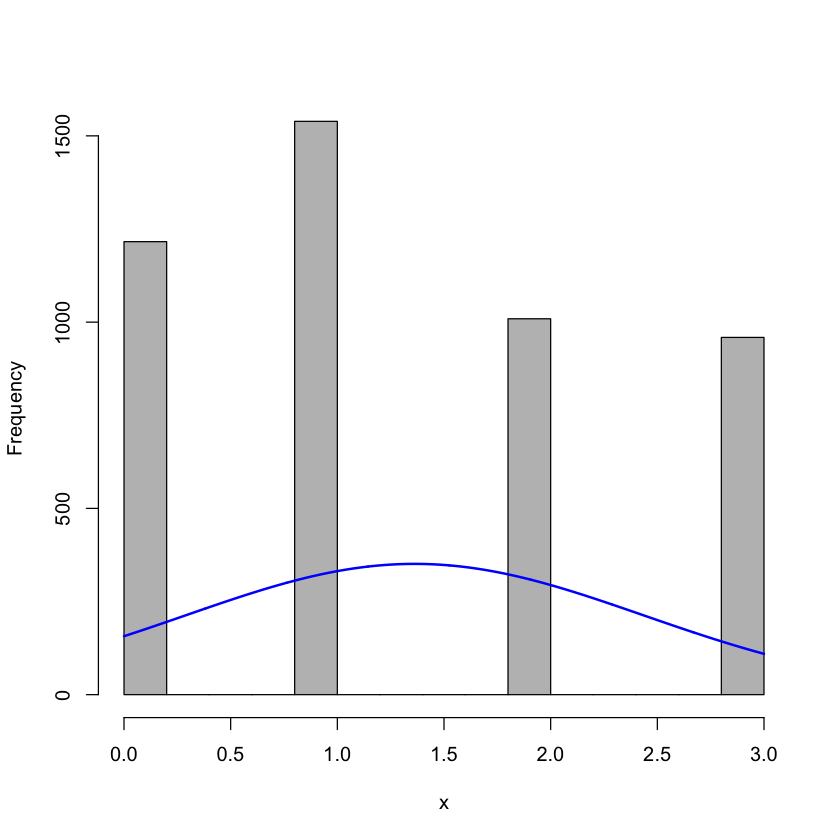

In [510]:
plotNormalHistogram(NYRtrim$RegionR)


# Homogeneity of Variance



In [513]:
leveneTest(CategoryR~RegionR, data=NYRtrim)


ERROR: Error in leveneTest.formula(CategoryR ~ RegionR, data = NYRtrim): Levene's test is not appropriate with quantitative explanatory variables.


# Homogeneity of Regression Slopes


In [ ]:
Homogeneity_RegrSlp = lm(CategoryR~RegionR, data=NYRtrim)
anova(Homogeneity_RegrSlp)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
RegionR,1,4.250847e-01,0.4250847,0.1225468,0.7263042
Residuals,4721,1.637599e+04,3.4687546,NA,NA


# Sample Size


# ANCOVAs Analysis

In [ ]:
ANCOVA = lm(CategoryR~Tweet+RegionR*Tweet,data=NYRtrim)
anova(ANCOVA)

ERROR: Error in lm.fit(x, y, offset = offset, singular.ok = singular.ok, ...): 0 (non-NA) cases
